In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import arviz as az

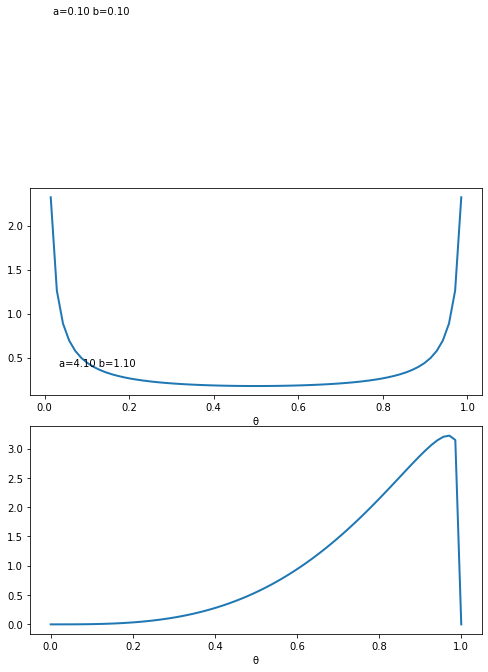

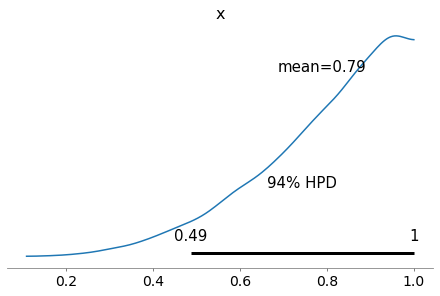

In [9]:
fig, ax = plt.subplots(2, figsize=(7,7))
fig.tight_layout()
fig.subplots_adjust(top=0.94)


domain = np.linspace(0.0, 1.0, 70)

a_prior = 0.1
b_prior = 0.1
a_post = 4 + a_prior
b_post = 1 + b_prior

param_kappa = [a_prior + b_prior, a_post + b_post]

def plot_beta (ax, a, b, kappa):
    with pm.Model():
        beta = pm.Beta(
            name=f"theta", 
            alpha=a,
            beta=b,
            transform=None
        )
        image = [ math.exp( beta.logp( {"theta": theta} ) ) 
                    for theta in domain
        ]
        ax.plot(domain, image, linewidth=2)
        ax.text(0.02, 4.4, f"a={a:0.2f} b={b:0.2f}")
        ax.set_xlabel('θ')       
        

az.plot_posterior(np.random.beta(a=a_post, b=b_post, size=10000))
plot_beta(ax[0], a_prior, b_prior, param_kappa[0])
plot_beta(ax[1], a_post, b_post, param_kappa[1])
    
plt.show()